<a href="https://colab.research.google.com/github/amrutha2413/Linear-Regression/blob/main/Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting parameters: [[0. 0. 0.]]
Alpha: 0.01 Epochs: 5000
Starting cost: 35684.42857142857
Final parameters: [[259.1984127   22.53940621  33.46266283]]
Final cost: 585.235754979889
RMSE: 34.9206132417138
R2: 0.6953846357745775


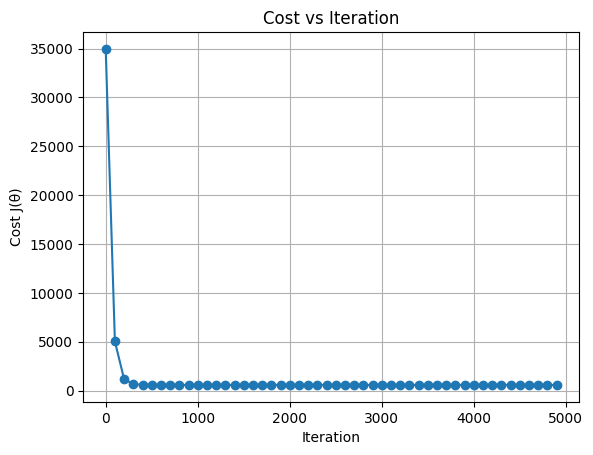

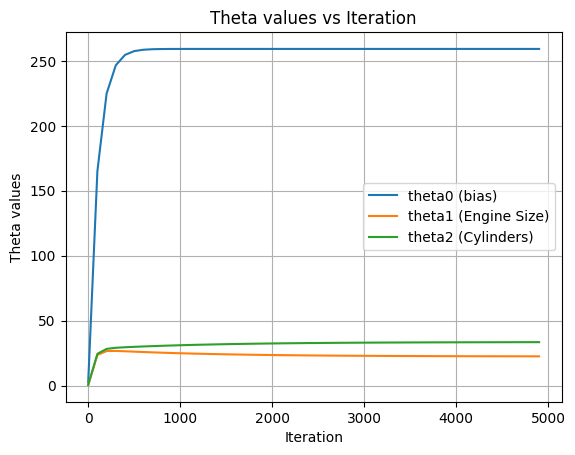

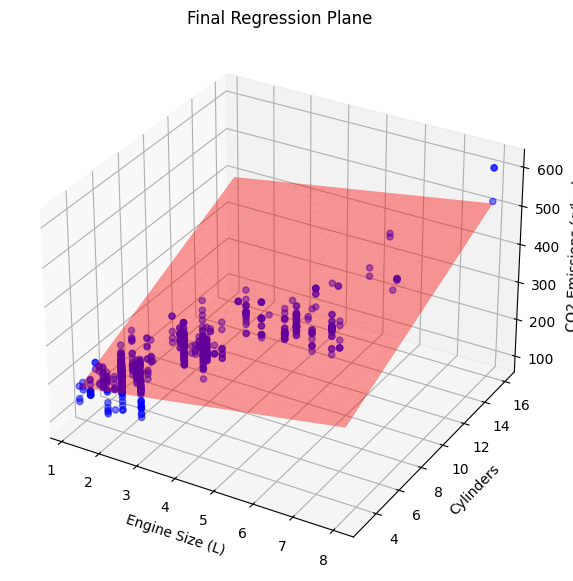

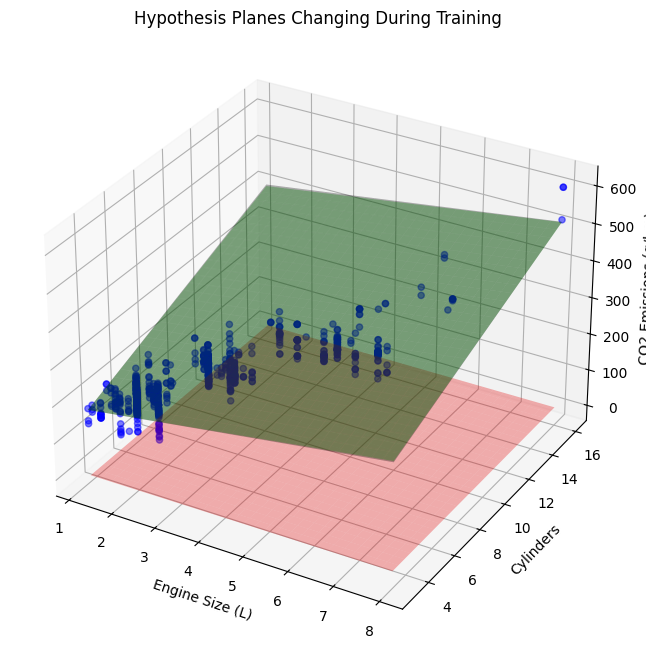

In [6]:
# linear_regression_co2.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("/content/sample_data/CO2 Emissions vs Engine Size vs Cylinders.csv")  # <-- update filename if needed
df = df[['Engine Size(L)', 'Cylinders', 'CO2 Emissions(g/km)']]

# Features and target
X = df[['Engine Size(L)', 'Cylinders']].values
y = df['CO2 Emissions(g/km)'].values.reshape(-1,1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term (column of 1s)
m = X_train_scaled.shape[0]
Xb = np.c_[np.ones((m,1)), X_train_scaled]


def compute_cost(X, y, theta):
    m = len(y)
    return (1/(2*m)) * np.sum((X.dot(theta)-y)**2)

def gradient_descent(X, y, theta, alpha=0.01, epochs=5000, record_every=100):
    m = len(y)
    J_history, theta_history, iters = [], [], []
    for i in range(epochs):
        grad = (1/m) * X.T.dot(X.dot(theta)-y)
        theta = theta - alpha*grad
        if i % record_every == 0:
            J_history.append(compute_cost(X,y,theta))
            theta_history.append(theta.copy())
            iters.append(i)
    return theta, J_history, theta_history, iters

theta0 = np.zeros((3,1))
alpha, epochs = 0.01, 5000

print("Starting parameters:", theta0.T)
print("Alpha:", alpha, "Epochs:", epochs)
print("Starting cost:", compute_cost(Xb, y_train, theta0))

theta_final, J_hist, theta_history, iters = gradient_descent(
    Xb, y_train, theta0, alpha, epochs
)

print("Final parameters:", theta_final.T)
print("Final cost:", compute_cost(Xb, y_train, theta_final))

X_test_b = np.c_[np.ones((X_test_scaled.shape[0],1)), X_test_scaled]
y_pred = X_test_b.dot(theta_final)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print("RMSE:", rmse)
print("R2:", r2)

# Cost vs Iteration
plt.figure()
plt.plot(iters, J_hist, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.title("Cost vs Iteration")
plt.grid(True)
plt.savefig("cost_vs_iter.png", dpi=200)

# Theta values vs Iteration
theta_array = np.array([t.flatten() for t in theta_history])
plt.figure()
plt.plot(iters, theta_array[:,0], label="theta0 (bias)")
plt.plot(iters, theta_array[:,1], label="theta1 (Engine Size)")
plt.plot(iters, theta_array[:,2], label="theta2 (Cylinders)")
plt.xlabel("Iteration")
plt.ylabel("Theta values")
plt.title("Theta values vs Iteration")
plt.legend()
plt.grid(True)
plt.savefig("theta_vs_iter.png", dpi=200)

# Final regression plane
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train.flatten(),
           color='blue', alpha=0.5, label="Train Data")

x1_range = np.linspace(X[:,0].min(), X[:,0].max(), 30)
x2_range = np.linspace(X[:,1].min(), X[:,1].max(), 30)
x1g, x2g = np.meshgrid(x1_range, x2_range)

x1g_std = (x1g - scaler.mean_[0]) / np.sqrt(scaler.var_[0])
x2g_std = (x2g - scaler.mean_[1]) / np.sqrt(scaler.var_[1])
X_grid_b = np.c_[np.ones(x1g_std.size), x1g_std.ravel(), x2g_std.ravel()]
z_pred = X_grid_b.dot(theta_final).reshape(x1g.shape)
# FInal regression Plane
# mkes sure to show hypthesis changing
ax.plot_surface(x1g, x2g, z_pred, alpha=0.4, color='red')
ax.set_xlabel("Engine Size (L)")
ax.set_ylabel("Cylinders")
ax.set_zlabel("CO2 Emissions (g/km)")
plt.title("Final Regression Plane")
plt.savefig("regression_plane.png", dpi=200)


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train.flatten(),
           color='blue', alpha=0.5, label="Train Data")

snapshots = [0, len(theta_history)//2, -1]
colors = ['red','green','black']
labels = ['Start θ','Mid θ','Final θ']

for idx, snap in enumerate(snapshots):
    theta_snap = theta_history[snap]
    z_pred = X_grid_b.dot(theta_snap).reshape(x1g.shape)
    ax.plot_surface(x1g, x2g, z_pred, alpha=0.3, color=colors[idx])

ax.set_xlabel("Engine Size (L)")
ax.set_ylabel("Cylinders")
ax.set_zlabel("CO2 Emissions (g/km)")
plt.title("Hypothesis Planes Changing During Training")
plt.savefig("hypothesis_planes.png", dpi=200)

plt.show()
